In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
import requests
%matplotlib inline

from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
import os
import itertools
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split as sk_split
import time

In [3]:
#Read in coordinate data from html and parse
page = urllib.urlopen("https://www.walkscore.com/NY/New_York").read()
soup = BeautifulSoup(page, "lxml")

In [5]:
right_table=soup.find('table', class_='tablesorter') 
rows = right_table.find_all('tr')[1:]
data = {
    'rank' : [],
    'name' : [],
    'walkscore' : [],
    'transitscore' : [],
    'bikescore' : []
}

for row in rows:
    cols = row.find_all('td')
    data['rank'].append( cols[0].get_text() )
    data['name'].append( cols[1].get_text() )
    data['walkscore'].append( cols[2].get_text() )
    data['transitscore'].append( cols[3].get_text() )
    data['bikescore'].append( cols[4].get_text() )
    
WalkData = pd.DataFrame( data )
WalkData.to_csv("neighborhood_walkability.csv")

In [7]:
print WalkData

    bikescore                   name rank transitscore walkscore
0         87            Little Italy    1         100        100
1         84       Flatiron District    2         100        100
2         87               Chinatown    3         100        100
3         82                   NoMad    4         100        100
4         89                  Bowery    5         100        100
5         81               Koreatown    6         100        100
6         85            Union Square    7         100        100
7         87                    NoHo    8         100        100
8         88                  NoLita    9         100        100
9         84           Gramercy Park   10         100        100
10        80      Financial District   11         100        100
11        84                 Tribeca   12         100         99
12        82        Garment District   13         100         99
13        87                    SoHo   14         100         99
14        86       Greenw

##### Code adapted from:
https://chihacknight.org/blog/2014/11/26/an-intro-to-web-scraping-with-python.html
https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/

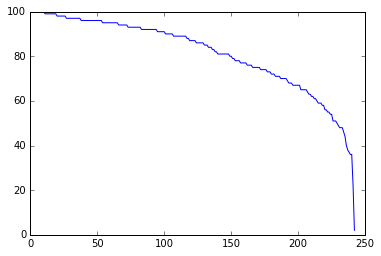

In [13]:
ws = WalkData['walkscore']

plt.plot(ws)